# Random forrest
- Iris dataset
- 2 features
- Multiclass

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from PlotFunction import plot_decision_surface_train_test
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [2]:
import os
imagePath = os.path.join(os.getcwd(),'Images')
if (not(os.path.isdir(imagePath))):
    os.mkdir(imagePath)

In [3]:
# Read data
iris = datasets.load_iris()

In [4]:
# Extract the last 2 columns
X = iris.data[:, 2:4]
y = iris.target

In [5]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [6]:
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
param = "ex1"
paramSetAll = {
    "ex1": {
        "criterion": "gini",
        "n_estimators": 25,
        "max_samples": None,
        "max_features": "auto",
        "max_depth": None,
    },
    "ex2": {
        "criterion": "gini",
        "n_estimators": 100,
        "max_samples": None,
        "max_features": "auto",
        "max_depth": 2,
    },
    "ex3": {
        "criterion": "gini",
        "n_estimators": 200,
        "max_samples": 20,
        "max_features": "auto",
        "max_depth": 2,
    },
}
paramValue = paramSetAll[param]

In [8]:
# Creating objects
forrest = RandomForestClassifier(**paramValue)

In [9]:
# Training
forrest.fit(X_train_std, y_train)

RandomForestClassifier(n_estimators=25)

In [10]:
# Prediction
y_pred = forrest.predict(X_test_std)

In [11]:
# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

In [12]:
# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

In [13]:
print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

Misclassified examples: 1
Accuracy score: 0.9777777777777777


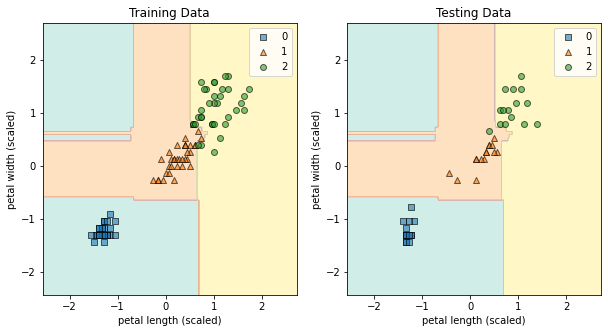

In [14]:
filenamePNG = "Images/T51_forrest_" + param + ".png"
plot_decision_surface_train_test(
    X_train_std, X_test_std, y_train, y_test, forrest, filename=filenamePNG
)

['sepal length (scaled)', 'sepal width (scaled)', 'petal length (scaled)', 'petal width (scaled)']


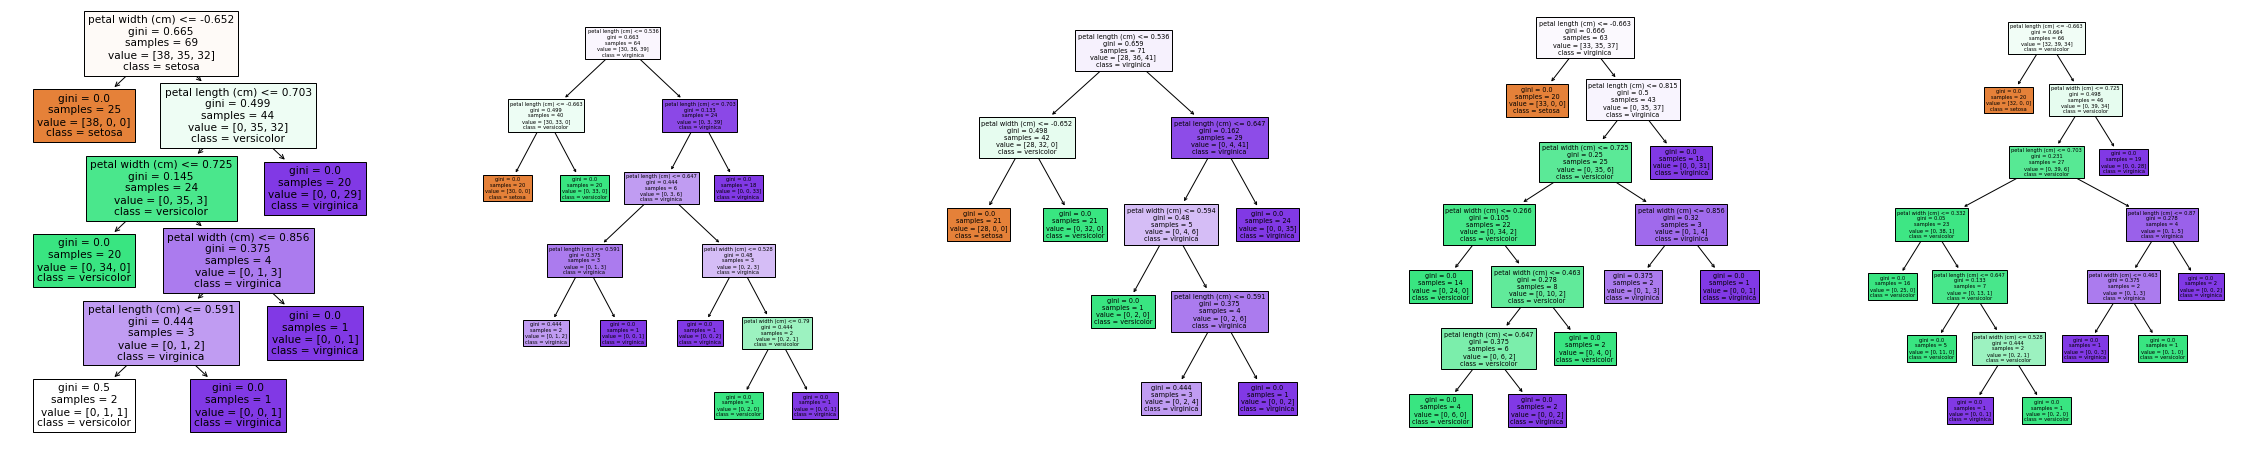

In [15]:
#Create label names
fn = [ st.replace("(cm)", "(scaled)") for st in iris.feature_names]
print(fn)

#Visualize trees
nTrees = 5
fig, ax = plt.subplots(1, nTrees, figsize=(40, 8))
for i in range(0, nTrees):
    plt.sca(ax[i])
    tree.plot_tree(
        forrest.estimators_[i],
        feature_names=iris.feature_names[2:4],
        class_names=iris.target_names,
        filled=True,
    )

filenamePDF = "Images/T51_forrest_decision_tree_" + param + ".pdf"
fig.savefig(filenamePDF)

## Need to install pdf2image and poppler

- `conda install -c conda-forge pdf2image`
- Go to https://github.com/oschwartz10612/poppler-windows/releases/ .
- Download zip file.
- Extract to `C:\Program Files\poppler-22.04.0`.
- Add `C:\Program Files\poppler-22.04.0\Library\bin` to `PATH`.

Source
- https://anaconda.org/conda-forge/pdf2image
- https://stackoverflow.com/a/70095504

In [16]:
from pdf2image import convert_from_path
filenameIMG = "Images/T51_forrest_decision_tree_" + param + ".png"
pages = convert_from_path(filenamePDF, 500)
for page in pages:
    page.save(filenameIMG, "PNG")